In [1]:
# **Observations made from the data:**

# --> 'Weight' is highly correlated to the 'Avergae Tumor Volume' as the correlation coefficient between them is '0.84'.
# --> From the box plot it can be clearly inferred that 'Infubinol' has one outlier with a 'Tumor Volume' of 36.32 mm^3.
# --> In case of the mouse with ID 'l509' being treated with 'Capomulin' drug, a gradual decrease in the Tumor Volume can be observed over the course of 45 days.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merge_df.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
263,o809,5,46.877243,0,Infubinol,Male,3,25
74,b559,20,55.654456,1,Naftisol,Male,20,26
2,b128,10,43.270852,0,Capomulin,Female,9,22
1735,s710,20,42.629963,1,Capomulin,Female,1,23
1152,n763,35,57.382413,3,Placebo,Female,16,25


In [3]:
# Checking the number of mice.
mice_count = merge_df['Mouse ID'].nunique()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice_ID = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'

duplicate_mouse_data = merge_df.loc[merge_df['Mouse ID']==duplicate_mouse_id, :]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df.loc[merge_df['Mouse ID'] != duplicate_mouse_id, :]

clean_df.sample(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
321,u327,40,60.466545,1,Ketapril,Male,17,25
1270,c757,10,49.219317,0,Placebo,Male,9,27
1357,y865,10,49.522740,1,Ceftamin,Male,23,26
1366,y769,5,46.422652,1,Ceftamin,Female,6,27
610,n364,15,36.940274,0,Ramicane,Male,4,17
1180,c282,0,45.000000,0,Placebo,Male,12,27
752,b879,30,60.907615,2,Stelasyn,Female,4,26
1325,l733,40,59.443506,1,Ceftamin,Female,4,30
928,f545,20,58.841189,1,Zoniferol,Female,20,26
558,i177,15,40.330935,0,Ramicane,Male,10,18


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = clean_df['Mouse ID'].nunique()
cleaned_mice_count

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_series = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_series = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_series = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_series = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_series = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean Tumor Volume": mean_series,
                                   "Median Tumor Volume": median_series,
                                   "Tumor Volume Variance": variance_series,
                                   "Tumor Volume Std. Dev.": std_dev_series,
                                   "Tumor Volume Std. Err.": sem_series})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = clean_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<Axes: xlabel='Drug Regimen', ylabel='# of observed Mouse Timepoints'>

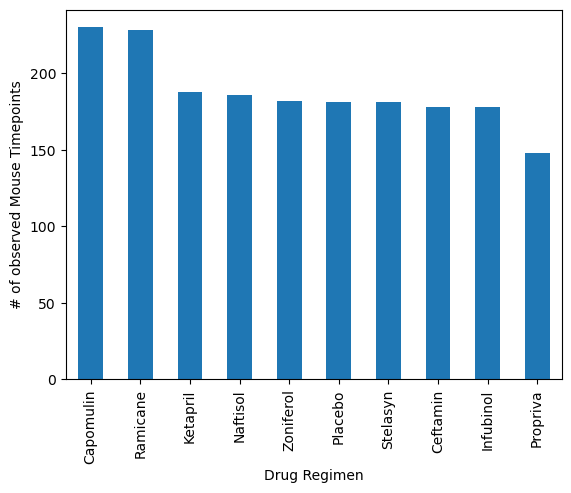

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_vs_mouse_id = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_vs_mouse_id = drug_vs_mouse_id.sort_values(ascending=False)

drug_vs_mouse_id.plot(kind='bar', ylabel= "# of observed Mouse Timepoints")

C:\Users\kunal\AppData\Local\Temp\ipykernel_35312\8556515.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(drug_vs_mouse_id.index ,rotation=90)


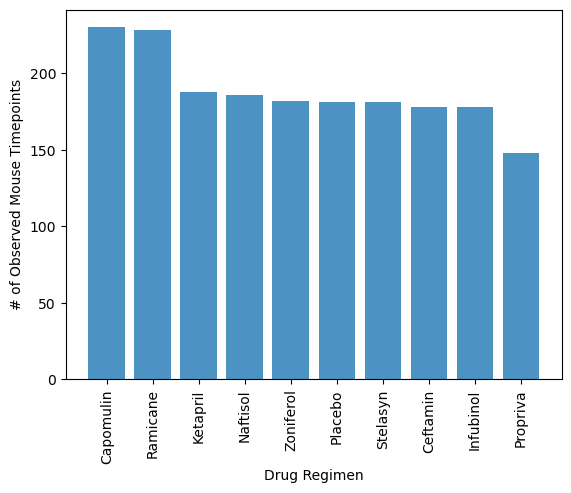

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

fig, ax = plt.subplots()

ax.bar(drug_vs_mouse_id.index, drug_vs_mouse_id, alpha=0.8)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.set_xticklabels(drug_vs_mouse_id.index ,rotation=90)
plt.show()

<Axes: ylabel='Sex'>

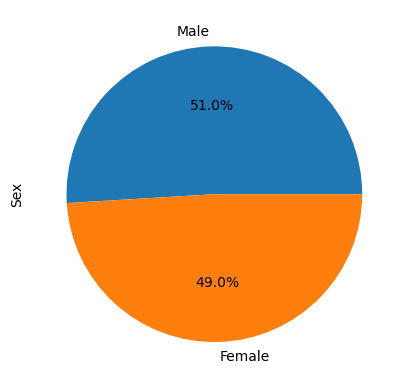

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_mix = clean_df['Sex'].value_counts()

gender_mix.plot(kind='pie', autopct="%1.1f%%", ylabel="Sex")

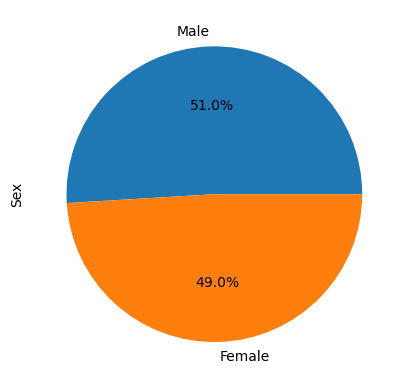

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_mix, labels=gender_mix.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

clean_timepoint_merge_df = pd.merge(clean_df,last_timepoint, on=['Mouse ID','Timepoint'],how='right')


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatment_list:
    
  # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_data = clean_timepoint_merge_df.loc[clean_timepoint_merge_df['Drug Regimen']==treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(subset_data)
    
    # Calculate the IQR   
    quartiles = subset_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    potential_outliers = subset_data.loc[(subset_data < lower_bound) | (subset_data > upper_bound)]

    print(f"{treatment}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


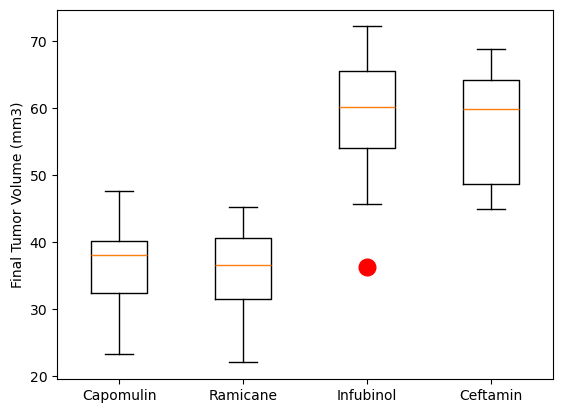

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot_data = [subset_data.values for subset_data in tumor_vol_data]

plt.boxplot(box_plot_data, labels=treatment_list, sym='r', flierprops = dict(markeredgecolor='black', markersize=12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

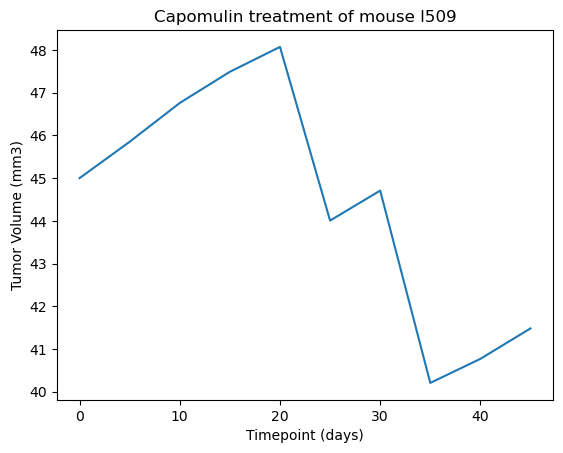

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_choice = 'l509'

mouse_choice_data = clean_df[(clean_df['Mouse ID']==mouse_choice) & (clean_df['Drug Regimen']=='Capomulin')]

plt.plot(mouse_choice_data['Timepoint'], mouse_choice_data['Tumor Volume (mm3)'])
plt.title(f"Capomulin treatment of mouse {mouse_choice}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

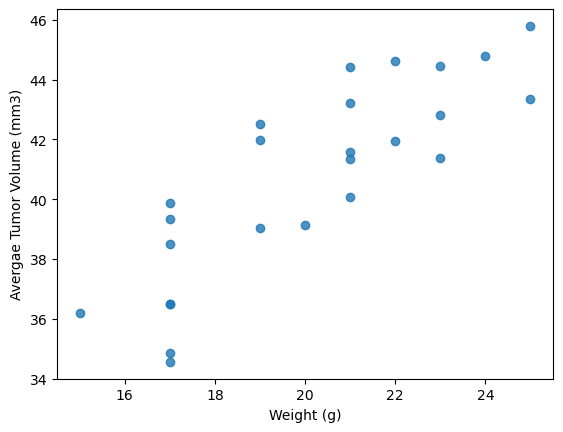

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_data = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']

avg_tumor_vol = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged1_data = pd.merge(avg_tumor_vol, Capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

plt.scatter(merged1_data['Weight (g)'], merged1_data['Tumor Volume (mm3)'],alpha=0.8)
plt.xlabel("Weight (g)")
plt.ylabel("Avergae Tumor Volume (mm3)")
plt.show()


The correlation between mouse weight and the average tumor volums is 0.84


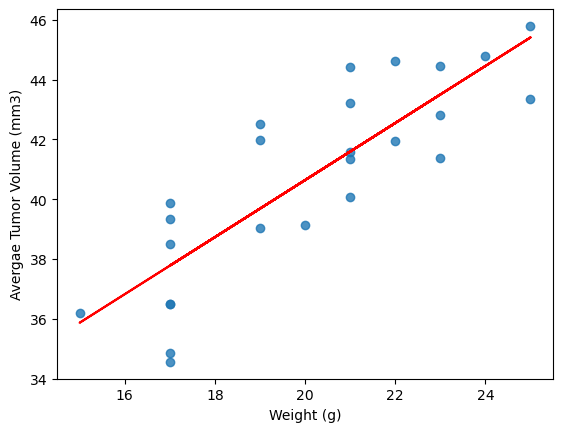

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr_coefficient = merged1_data['Weight (g)'].corr(merged1_data['Tumor Volume (mm3)'])

slope, intercept, r_value, p_value, std_err = linregress(merged1_data['Weight (g)'], merged1_data['Tumor Volume (mm3)'])

plt.scatter(merged1_data['Weight (g)'], merged1_data['Tumor Volume (mm3)'],alpha=0.8)

my_line = slope * merged1_data['Weight (g)'] + intercept

print(f"The correlation between mouse weight and the average tumor volums is {round(corr_coefficient,2)}")
plt.plot(merged1_data['Weight (g)'], my_line, color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Avergae Tumor Volume (mm3)")
plt.show()